In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from snudda.utils.load import SnuddaLoad
from snudda.neurons.neuron_morphology import NeuronMorphology

In [2]:
external = os.path.join("/media","jofrony","2TB","dardel", "current_bgd2","population_unit", "surround_inhibition", "supercomputer", 
                        "networks", "pdc_network_2022-08-31")
network_path = os.path.join(external,"network-synapses.hdf5")

In [3]:
network_data = SnuddaLoad(network_file=network_path)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions


In [15]:
neuron_types = network_data.get_neuron_types()
soma_positions = network_data.data["neuronPositions"]
population_units = network_data.data["populationUnit"]
population_unit_colour = {0: "grey", 1 : "red"}
remove_grids = True
step_size = 10
scale_position_x = 5.2e-3

In [5]:
BGD = os.environ["BASALGANGLIADATA"]

In [6]:
config_path = os.path.join(external,"network-config.json")

In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np
with open(config_path) as f:
    jsl = json.load(f)

In [8]:
centre = jsl['PopulationUnits']['Striatum']['centres'][0]

In [9]:
%%time
tmp = dict()
for test in network_data.data['neurons']:
    if (test['populationUnit'] == 1 and test["type"]=="dSPN") or (test['populationUnit'] == 1 and test["type"]=="iSPN"):
        
        name = test["name"]
        param = jsl["Neurons"][test["name"]]["parameters"].replace("$SNUDDA_DATA", BGD)
        mech = jsl["Neurons"][test["name"]]["mechanisms"].replace("$SNUDDA_DATA", BGD)
        morph = jsl["Neurons"][test["name"]]["morphology"].replace("$SNUDDA_DATA", BGD)
        modulation = jsl["Neurons"][test["name"]]["modulation"].replace("$SNUDDA_DATA", BGD)
        parameter_id = test["parameterID"]
        morphology_id = test["morphologyID"]
        modulation_id = test["modulationID"]
        swc_filename = test["morphology"].replace("/cfs/klemming/home/j/jofn/BasalGangliaData/data", BGD)
        parameter_key = test["parameterKey"]
        morphology_key = test["morphologyKey"]
        modulation_key = test["modulationKey"]
        a_neuron = NeuronMorphology(param_filename=param,
                           swc_filename=swc_filename,
                           mech_filename=mech,
                           name=name,
                           modulation=modulation,
                           morphology_id=morphology_id,
                           parameter_id=parameter_id,
                           modulation_id=modulation_id,
                           parameter_key=parameter_key,
                           morphology_key=morphology_key,
                           modulation_key=modulation_key)
        a_neuron.load_neuron_morphology()
        a_neuron.find_radius()
        tmp.update({test['neuronID']:a_neuron.max_axon_radius})

CPU times: user 395 ms, sys: 15.7 ms, total: 411 ms
Wall time: 409 ms


In [10]:
axons = [ k for r, k in tmp.items()]

In [11]:
axon_extent = np.mean(axons)

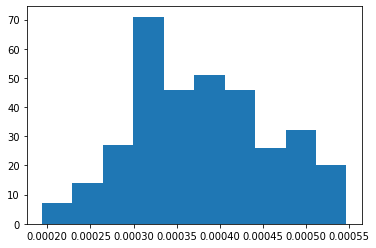

In [12]:
plt.hist(axons)
plt.show()

In [13]:
alpha=0.02

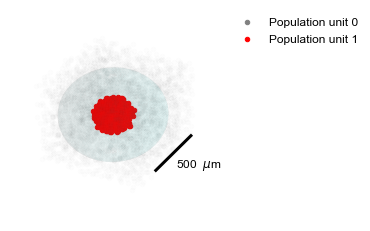

CPU times: user 1min 7s, sys: 4.1 s, total: 1min 11s
Wall time: 1min 7s


In [16]:
%%time
plot_position_3D_population_unit_axonal_extent(soma_positions=soma_positions, 
                     population_units=population_units,
                     centre=centre,
                     axon_extent = axon_extent,
                     alpha=alpha,
                     colour=population_unit_colour, 
                     remove_grids=remove_grids,
                     step_size=step_size,
                     scale_position_x=scale_position_x)